In [45]:
from keras import models
from keras import layers
import numpy as np
import math
import json

In [46]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(1600,)))
model.add(layers.Dense(64,activation='relu',input_shape=(1600,)))
model.add(layers.Dense(45,activation='softmax'))

In [47]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [48]:
obj_r=open("./test/json/t_domain_data2.json")
obj_r2 = open("./test/json/t_domain_pitch2.json")
input_train = json.load(obj_r)
input_train = np.array(input_train)
y = json.load(obj_r2)
y = np.array(y)
y = y*2093.004

obj_r3=open("./test/json/t_domain_data1.json")
obj_r4 = open("./test/json/t_domain_pitch1.json")
test = json.load(obj_r3)
test = np.array(test)
t = json.load(obj_r4)
t = np.array(t)
t = t*2093.004


In [49]:
def fre_to_note_piano(fre):
    index = round(math.log(fre / 27.5,2**(1/12)))
    dict = ["A1 ","#A1 ","B1 ","C2 ","#C2 ","D2 ","#D2 ","E2 ","F2 ","#F2 ","G2 ","#G2 ","A2 ","#A2 ","B2 ","C3 ","#C3 ","D3 ","#D3 ","E3 ","F3 ","#F3 ","G3 ","#G3 ","A3 ","#A3 ","B3 ","C4 ","#C4 ","D4 ","#D4 ","E4 ","F4 ","#F4 ","G4 ","#G4 ","A4 ", "#A4 ", "B4 ", "C5 ", "#C5 ", "D5 ", "#D5 ", "E5 ","F5 ","#F5 ","G5 ","#G5 ","A5 ", "#A5 ", "B5 ", "C6 ", "#C6 ", "D6 ", "#D6 ", "E6 ",
    "F6 ","#F6 ","G6 ","#G6 ","A6 ", "#A6 ", "B6 ", "C7 ", "#C7 ", "D7 ", "#D7 ", "E7 ","F7 ","#F7 ","G7 ","#G7 ","A7 ", "#A7 ", "B7 ", "C8 ","#C8 ","D8 ","#D8 ","E8 ","F8 ","#F8 ","G8 ","#G8 ","A8 ","#A8 ","B8 ","C9 ","#C9 ", "D9 ", "#D9 ", "E9 ","F9 ","#F9 ","G9 ","#G9 ","A9 ", "#A9 ", "B9 ", "C10 "]
    return index+21
y_train = np.zeros((len(y),45))
test_standard = []
for i in range(len(y)):
    index = fre_to_note_piano(y[i])
    y_train[i][index-40] = 1

for j in range(len(t)):
    index = fre_to_note_piano(t[j])
    test_standard.append(index)



In [ ]:
history=model.fit(input_train,y_train,batch_size=2,epochs=1000)

Epoch 1/1000
756/756 [==============================] - 1s 829us/step - loss: 3.0814 - acc: 0.2103
Epoch 2/1000
756/756 [==============================] - 1s 803us/step - loss: 3.1084 - acc: 0.2024
Epoch 3/1000
756/756 [==============================] - 1s 768us/step - loss: 3.0940 - acc: 0.1984
Epoch 4/1000
756/756 [==============================] - 1s 741us/step - loss: 3.1104 - acc: 0.2037
Epoch 5/1000
756/756 [==============================] - 1s 716us/step - loss: 3.2153 - acc: 0.2037
Epoch 6/1000
756/756 [==============================] - 1s 738us/step - loss: 3.0943 - acc: 0.2090
Epoch 7/1000
756/756 [==============================] - 1s 720us/step - loss: 3.0848 - acc: 0.2090
Epoch 8/1000
756/756 [==============================] - 1s 715us/step - loss: 3.0863 - acc: 0.2050
Epoch 9/1000
756/756 [==============================] - 1s 720us/step - loss: 3.0533 - acc: 0.2103
Epoch 10/1000
756/756 [==============================] - 1s 843us/step - loss: 3.1046 - acc: 0.2063
Epoch 11/

In [54]:
predict = model.predict(test)
predict_note = []
for i in range(len(predict)):
    index = np.argmax(predict[i])
    predict_note.append(index+40)

num = 0
wrong_num = 0
for i in range(len(predict_note)):
    if abs(predict_note[i] - test_standard[i])==0:
        num += 1
    else:
        wrong_num += 1
accuracy = num/len(predict_note)
print(predict_note)
print(test_standard)
dis = []
for i in range(len(predict_note)):
    dis.append(abs(predict_note[i] - test_standard[i]))
print(dis)
print("总量：",len(predict_note),"错误量：",wrong_num)
print("正确率：",accuracy)

[78, 78, 52, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 55, 78, 78, 78, 78, 62, 78, 78, 78, 78, 78, 55, 44, 47, 78, 43, 78, 78, 78, 78, 78, 63, 78, 78, 78, 55, 62, 55, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 41, 78, 62, 43, 43, 55, 78, 78, 78, 61, 78, 78, 55, 78, 78, 78, 52, 78, 44, 78, 57, 78, 57, 78, 78, 78, 44, 78, 78, 78, 69, 78, 63, 78, 78, 78, 57, 78, 43, 78, 41, 78, 52, 57, 78, 78, 44, 78, 78, 78, 78, 78, 78, 78, 57, 78, 78, 78, 44, 78, 78, 43, 44, 78, 78, 78, 78, 78, 57, 78, 78, 78, 78, 78, 62, 78, 78, 78, 78, 78, 78, 78, 78, 78, 44, 78, 44, 78, 78, 69, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 83, 44, 78, 55, 78, 78, 78, 62, 78, 78, 78, 78, 78, 62, 78, 78, 78, 78, 78, 78, 78, 44, 78, 78, 78, 78, 78, 78, 78, 52, 78, 78, 78, 44, 78, 78, 78, 78, 78, 78, 78, 63, 78, 78, 57, 62, 78, 78, 78, 61, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 57, 55, 47, 61, 78, 78, 78, 78, 78, 63, 78, 78, 44, 69, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 61, 78, 78, 78, 78, 78, 78, 78,

dict_keys(['loss', 'acc'])


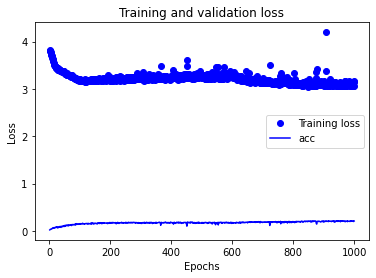

In [52]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
print(history_dict.keys())

acc = history_dict['acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc, 'b', label='acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()